Математический маятник массой m гр, подвешенный на струне длины L см совершает
небольшие колебания в среде, в которой коэффициент затуханий $$f с^{−1}$$. Пусть в начальный
момент маятник отклонён от вертикали на угол ϕ и опущен с начальной скоростью v0. Вы-
писать уравнение математического маятника с трением и решить начальную задачу для этого
уравнения. Построить график решения при t ∈ [0, b].

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

In [2]:
m = 350
L = 75
f = 2.4
phi = np.pi / 4
v_0 = 1.5
b  = 11

m /= 1000
L /= 100

g = 9.81

k = g / L

print("""
m = {} kg
L = {} m
f = {} s^-1
phi = {} / 4
v_0 = {} mps
b = {} [sec]
k = {} s^-2
""".format(m, L, f, phi, v_0, b, k))


m = 0.35 kg
L = 0.75 m
f = 2.4 s^-1
phi = 0.7853981633974483 / 4
v_0 = 1.5 mps
b = 11 [sec]
k = 13.08 s^-2



In [3]:
delta = f * m * .5
omega_0 = np.sqrt(k / m)

delta, omega_0


(0.42, np.float64(6.113217530190512))

In [4]:
omega = np.sqrt(np.pow(omega_0, 2) - np.pow(delta, 2))
omega

np.float64(6.0987727102613505)

$$
0.35x'' + 2.4x' + 13.08x = 0
$$
$$
x(0) = \frac{\pi}{4}
$$
$$
x'(0) = 1.5
$$



In [5]:
D = f * f - 4 * m * k

lmbd1 = (-f + np.sqrt(D + 0j)) / (2 * m)
lmbd2 = (-f - np.sqrt(D + 0j)) / (2 * m)
lmbd1, lmbd2

(np.complex128(-3.4285714285714284+5.061257406081244j),
 np.complex128(-3.4285714285714284-5.061257406081244j))

In [6]:
L1 = lmbd1.real
L2 = np.abs(lmbd1.imag)
lmbd1.real, lmbd1.imag

(np.float64(-3.4285714285714284), np.float64(5.061257406081244))

In [7]:
tan_eta = ((v_0 / phi) - L1) / L2
tan_eta

np.float64(1.0547637310957345)

In [8]:
eta = np.arctan(tan_eta)
eta

np.float64(0.8120439372905053)

In [9]:
A = phi / (2 * np.cos(eta))
A

np.float64(0.5707697806808261)

In [10]:
x_t = lambda t: 2 * A * np.exp(L1 * t) * np.cos(eta + L2 * t)

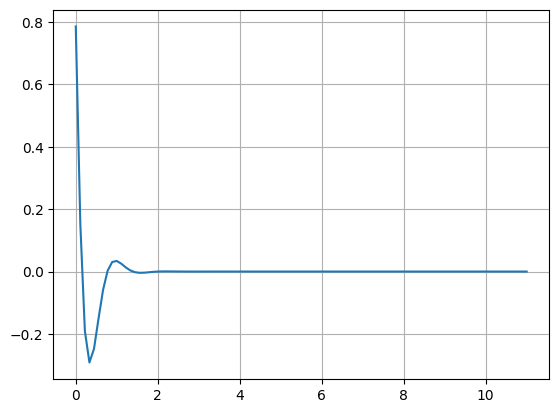

In [11]:
def main(N):
    t = np.linspace(0, b, N)
    y = x_t(t)
    # print(t, y)
    plt.plot(t, y)
    plt.grid()
    plt.show()

main(100)

C:\Users\games\AppData\Local\Temp\ipykernel_18496\3661284515.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
MovieWriter ffmpeg unavailable; using Pillow instead.


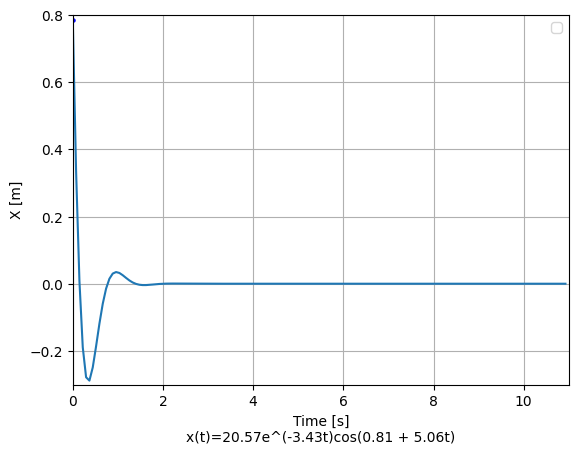

In [12]:
fig, ax = plt.subplots()
N = 150
t = np.linspace(0, b, N)
z = x_t(t)

v02 = 5
z2 = x_t(t)

scat = ax.scatter(t[0], z[0], c="b", s=5)
line2 = ax.plot(t[0], z2[0])[0]
ax.set(xlim=[0, b], ylim=[-0.3, 0.8], xlabel=f'Time [s]\nx(t)=2{round(A, 2)}e^({round(L1, 2)}t)cos({round(eta, 2)} + {round(L2, 2)}t)', ylabel='X [m]')
ax.legend()
ax.grid()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    # scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=N, interval=30)
ani.save("l02_3.gif")
plt.show()

$$

$$

MovieWriter ffmpeg unavailable; using Pillow instead.


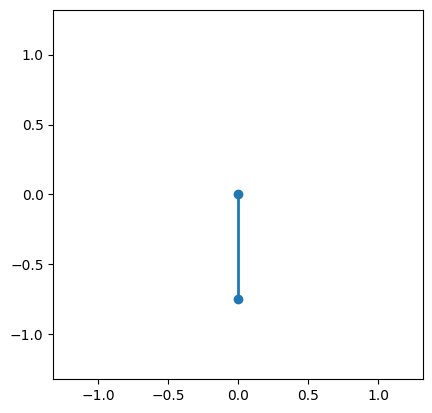

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


t = np.linspace(0, b, 2 * N) 


def theta(t):
    return x_t(t)


fig, ax = plt.subplots()
ax.set_xlim(-L - A, L + A)
ax.set_ylim(-L - A, L + A)
ax.set_aspect('equal')


line, = ax.plot([], [], 'o-', lw=2)


def init():
    line.set_data([], [])
    return line,

# Функция обновления для анимации
def update(frame):
    x = L * np.sin(theta(t[frame]))
    y = -L * np.cos(theta(t[frame]))
    line.set_data([0, x], [0, y])
    return line,

# Создание анимации
ani = animation.FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True)
ani.save("l02_4.gif")
# Показ анимации
plt.show()


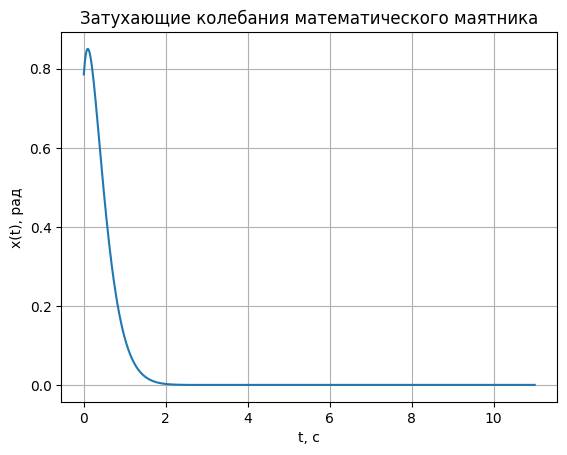

In [14]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 11, 500)
x = np.exp(-3.429*t) * (0.785 * np.cos(1.15*t) + 3.64 * np.sin(1.15*t))

plt.plot(t, x)
plt.title('Затухающие колебания математического маятника')
plt.xlabel('t, с')
plt.ylabel('x(t), рад')
plt.grid(True)
plt.show()
